# Emotion Recognition in Text using neural LLMS
By Jesse E. and Alina G. 

Using [this](https://github.com/dair-ai/emotion_dataset) dataset with sampled tweets + preprocessed emotions as labels. 

__Annotations of different emotions:__
Anger : 0
Fear : 1
Joy : 2
Love : 3
Sadness : 4
Surprise : 5

In [10]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

EMOTION_KEY = {0: 'anger', 1: 'fear', 2: 'joy', 3:'love', 4:'sadness', 5: 'surprise'} # manually done 

In [11]:
df = pd.read_csv('data/training.csv')
df['label_text'] = [EMOTION_KEY[_] for _ in df['label']]
df.head()

,text,label,label_text
0,i didnt feel humiliated,0,anger
1,i can go from feeling so hopeless to so damned...,0,anger
2,im grabbing a minute to post i feel greedy wrong,3,love
3,i am ever feeling nostalgic about the fireplac...,2,joy
4,i am feeling grouchy,3,love


In [17]:
len(df)

16000

In [3]:
# write the data frame to .txt file 

path = 'data/training.txt'

with open(path, 'w') as file: 
    for line in list(df['text']): 
        file.write(line + '\n')

In [19]:
px.histogram(df["label_text"], title='Original Distribution of Labels') # everyone is afraid i guess


## Balancing the data

In [5]:
# Determine the number of data points for the 'fear' class
fear_count = df[df['label'] == 1].shape[0]

# Get the data points for each emotion class with the same count as 'fear'
balanced_data = pd.concat([df[df['label'] == label].sample(fear_count, replace=True, random_state=42) 
                           for label in range(6)])

# Save the balanced data to a new CSV file
balanced_data.to_csv('data/balanced_data.csv', index=False)


In [6]:
# write the data frame to .txt file 

path = 'data/balanced_training.txt'

with open(path, 'w') as file: 
    for line in list(balanced_data['text']): 
        file.write(line + '\n')

In [7]:
px.histogram(balanced_data["label_text"]) # thats better

### Exploring the data; which words define an emotion? 
lets make word clouds :))) 

In [13]:
def parse(lst:list, stopwords):
    """ parses a list of strings representing tweets """ 
    valid_total = []
    for tweet in lst: 
        tweet = tweet.split()
        valid = [word for word in tweet if word not in stopwords]
        valid_total.append(" ".join(valid))
    return " ".join(valid_total)

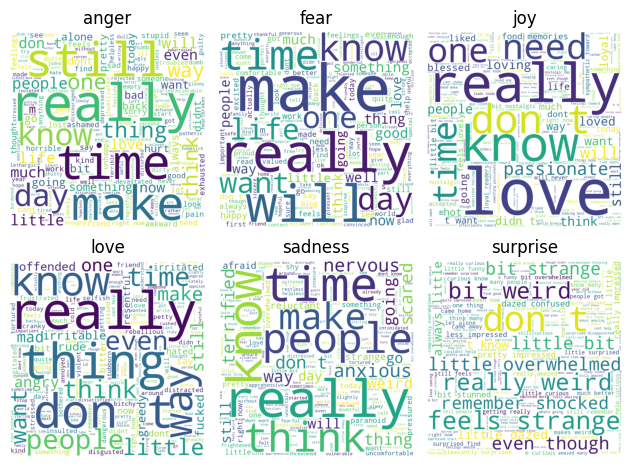

In [16]:
stopwords = set(list(STOPWORDS) + ['feel', 'feeling', 'ive', 'im'])

# generate a word cloud for every... label
for label in EMOTION_KEY.keys(): 
    sub_df = balanced_data.loc[balanced_data['label'] == label] # gets only values with this specific label 
    text = parse(sub_df['text'].tolist(), stopwords)
    wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
    # plot the WordCloud image  
    plt.subplot(2, 3, label+1)     
    plt.title(EMOTION_KEY[label])                
    # plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 1)
    
plt.show()